# The Covid Dragons

*A visual analysis of the remarkably low infection and/or fatality rates in Hong Kong, Taiwan, and South Korea utilizing the `see19` dataset [available here](https://github.com/ryanskene/see19).*

In [1]:
from datetime import datetime as dt
print ('Last Updated: ', dt.now().strftime('%b %d, %Y'))

Last Updated:  May 12, 2020


***Analysis compatible with version 0.2.0 of see19***

These are our usual preparations. Import `see19` and download the dataset via `get_baseframe`.

In [2]:
from bokeh.io import output_notebook, show
output_notebook()
%matplotlib inline 

Loading BokehJS ...

In [3]:
from see19 import CaseStudy, get_baseframe
baseframe = get_baseframe()

## Enter the Dragons

Hong Kong, Taiwan, and South Korea have had remarkable success containing the virulence of COVID19, both in terms of number of infections and fatalities.

We can use the `see19` dataset and the `CaseStudy` interface of the `see19` python package to confirm that these regions have indeed been successful and explore potential reasons why.

To do so, instantiate a new `CaseStudy` instance focusing on the ***Covid Dragons*** regions, the average data for the World, and some other comparable regions.

We have chosen New York, Lombardia, Sao Paulo, and New South Wales for comparison.

In [4]:
dragons = ['Hong Kong', 'Taiwan', 'Korea, South']
notables = [ 'WorldAvg', 'New York', 'Lombardia', 'Sao Paulo', 
#             'New South Wales'
           ]
regions = notables + dragons

factors_with_dmas = ['uvb', 'temp'] + CaseStudy.STRINDEX_CATS
factor_dmas = {factor: 28 for factor in factors_with_dmas}
mobi_dmas = {'transit': 28, 'retail_n_rec': 28, 'parks': 28, 'workplaces': 28}
factors = factors_with_dmas + CaseStudy.MOBIS + ['A15_34B', 'A65PLUSB'] \
    + ['visitors', 'gdp'] + CaseStudy.MAJOR_CAUSES

casestudy = CaseStudy(
    baseframe, regions=regions, count_dma=21, factors=factors, factor_dmas=factor_dmas, 
    mobi_dmas=mobi_dmas, start_hurdle=1, start_factor='deaths', lognat=True,
    favor_earlier=True, factors_to_favor_earlier='key3_sum', world_averages=True,
)

We can use the `comp_chart` attribute to quickly chart a comparison between the Dragons and one of the world's most impacted regions, New York State.

In [5]:
kwargs = {
    'width': 625, 'height': 400,
    'regions': dragons + ['New York'],
    'fs_xticks': 8, 'fs_yticks': 8,
    'fs_labels': 12,
    'label_offsets': {
        'New York': {'x_offset': 20, 'y_offset': 0},
        'Taiwan': {'x_offset': -96, 'y_offset': 39},
        'Hong Kong': {'x_offset': -118, 'y_offset': 22},
        'Korea, South': {'x_offset': -70, 'y_offset': 5},
    },
   'title': 'the Dragons v New York'
}
p = casestudy.comp_chart.make(comp_type='multiline', **kwargs)
show(p)

In terms of daily fatalities, the Dragons don't even register on the chart ... ever ... for the entire time frame.

Instead of line charts, we will utilize the `barcharts` attribute of the `casestudy` to compare multiple regions on different categories more easily. The `barcharts` object filters `casestudy.df` for maximum, minimum, and mean values (depending on the category) for comparison purposes.

First, we will simply compare `deaths` and `cases` adjusted for population size.

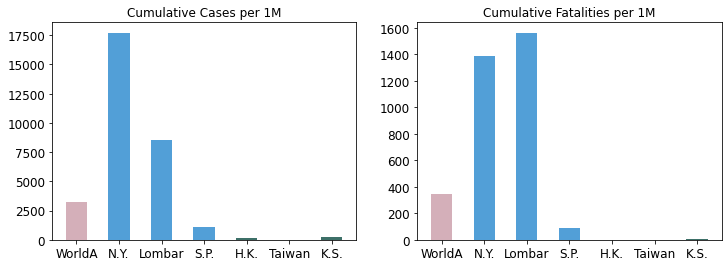

In [14]:
factors1 = ['cases_per_1M', 'deaths_per_1M']
kwargs = {'factors': factors1, 'height': 4, 'width': 12, 'colors': ['#3D7068', '#D4AFB9', '#529FD7']}
kwargs['save_file'] = True
kwargs['filename'] = '/Users/spindicate/Documents/docs/covid19/charts/Dragon Comp.png'
plt = casestudy.barcharts.make(**kwargs)

Again, the dragons barely register against the world average `WorldA` or the other regions displayed.

`barcharts` can compare daily case and fatality rates by finding the maximum daily value over the DMA selected.

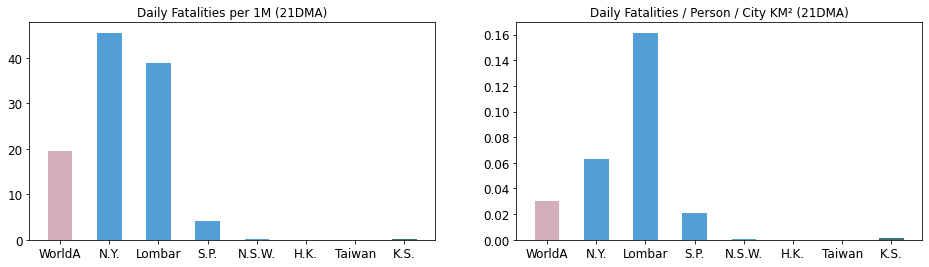

In [14]:
factors2 = ['deaths_new_dma_per_1M', 'deaths_new_dma_per_person_per_city_KM2']
kwargs = {'factors': factors2, 'height': 4, 'colors': ['#3D7068', '#D4AFB9', '#529FD7']}
plt = casestudy.barcharts.make(**kwargs)

Still nothing. Even on a density adjusted basis, the dragons have had very small outbreaks.

This despite having comparably large populations and dense regions.

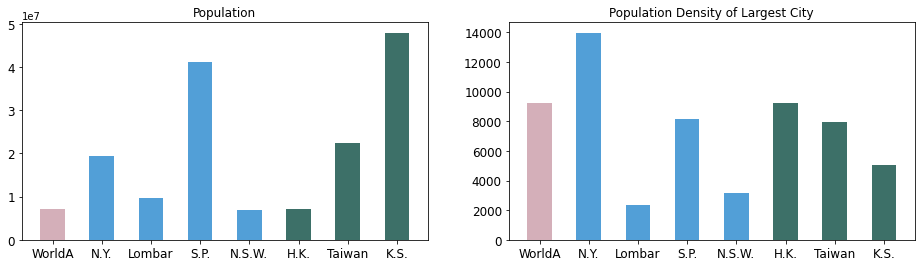

In [8]:
factors3 = ['population', 'city_dens']
kwargs = {'factors': factors3, 'height': 4, 'colors': ['#3D7068', '#D4AFB9', '#529FD7']}
plt = casestudy.barcharts.make(**kwargs)

In terms of social distancing, the dragons have had average social distancing practices as per below. Social distancing DMA is the maximum daily value in the `casestudy.df`. Taiwan has actually had well below average social distancing regulations

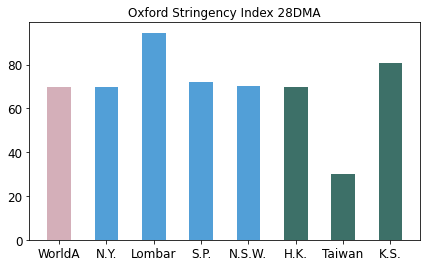

In [9]:
factors4 = ['strindex_dma']
kwargs = {'factors': factors4, 'width': 7, 'height': 4, 'colors': ['#3D7068', '#D4AFB9', '#529FD7']}
plt = casestudy.barcharts.make(**kwargs)

But social distancing practices did **NOT** restrict movement to nearly the same extent. The dragons did **NOT** quarantine their people.

The chart below may be somewaht confusing. The positive value is the **decline** in mobility, so larger values indicate **LESS** mobility relative to baseline.

In Taiwan, they kept going to work like nothing happened!!!

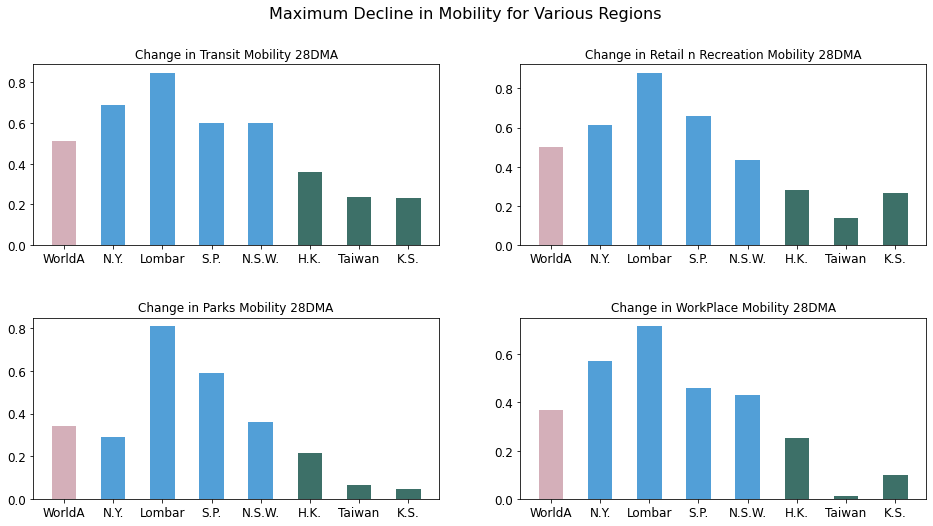

In [10]:
factors5 = ['transit_dma', 'retail_n_rec_dma', 'parks_dma', 'workplaces_dma']
kwargs = {'factors': factors5, 'height': 8, 'colors': ['#3D7068', '#D4AFB9', '#529FD7'], 'y_title': .98}
kwargs['title'] = 'Maximum Decline in Mobility for Various Regions'
plt = casestudy.barcharts.make(**kwargs)

Below we see the dragons have population ages inline with the national average, though they may skew slightly younger.

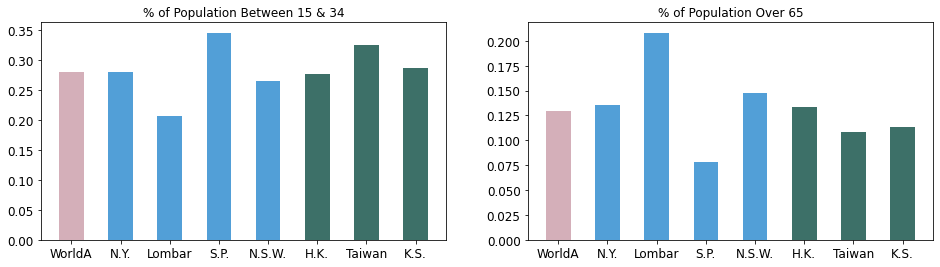

In [11]:
factors6 = ['A15_34B_%', 'A65PLUSB_%']
kwargs = {'factors': factors6, 'height': 4, 'colors': ['#3D7068', '#D4AFB9', '#529FD7']}
plt = casestudy.barcharts.make(**kwargs)

The average temperature in the regions of the Dragons was quite different. South Korea is obviously much further north than Hong Kong and Taiwan is in between. So their max average temperatures during the period in `casestudy.df` straddled the world average. UVB radiation was slightly ahead of the average.

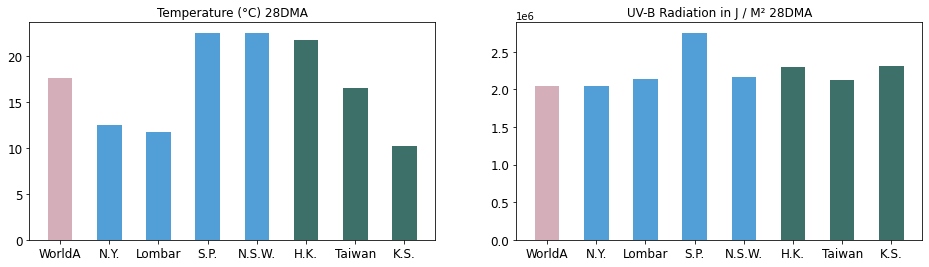

In [134]:
factors7 = ['temp_dma', 'uvb_dma']
kwargs = {'factors': factors7, 'height': 4, 'colors': ['#3D7068', '#D4AFB9', '#529FD7']}
plt = casestudy.barcharts.make(**kwargs)

The dragons do appear to have slightly better than average health outcomes related to heart disease, although these are offset by somewhat higher incidence of fatalities due to diabetes. Except for Hong Kong, where the government does not seem to track deaths due to diabetes.

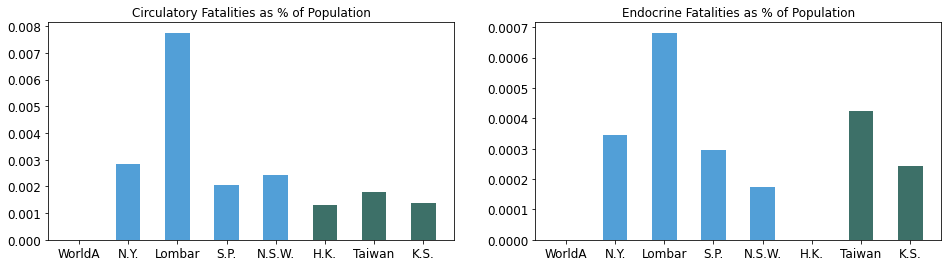

In [135]:
factors8 = ['circul_%', 'endo_%',]
kwargs = {'factors': factors8, 'height': 4, 'colors': ['#3D7068', '#D4AFB9', '#529FD7']}
plt = casestudy.barcharts.make(**kwargs)

The story is also mixed in terms of international tourism. As a percentage of population, Hong Kong is one of the most popular destinations in the world, while Taiwan and South Korea are more inline to slightly below the comparison regions.

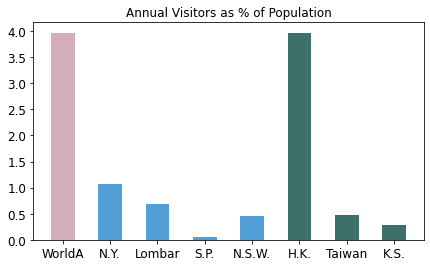

In [136]:
factors9 = ['visitors_%',]
kwargs = {'factors': factors9, 'width': 7,'height': 4, 'colors': ['#3D7068', '#D4AFB9', '#529FD7']}
plt = casestudy.barcharts.make(**kwargs)

As a matter of convenience, we can print out all of the above subplots in one large plot as per below:

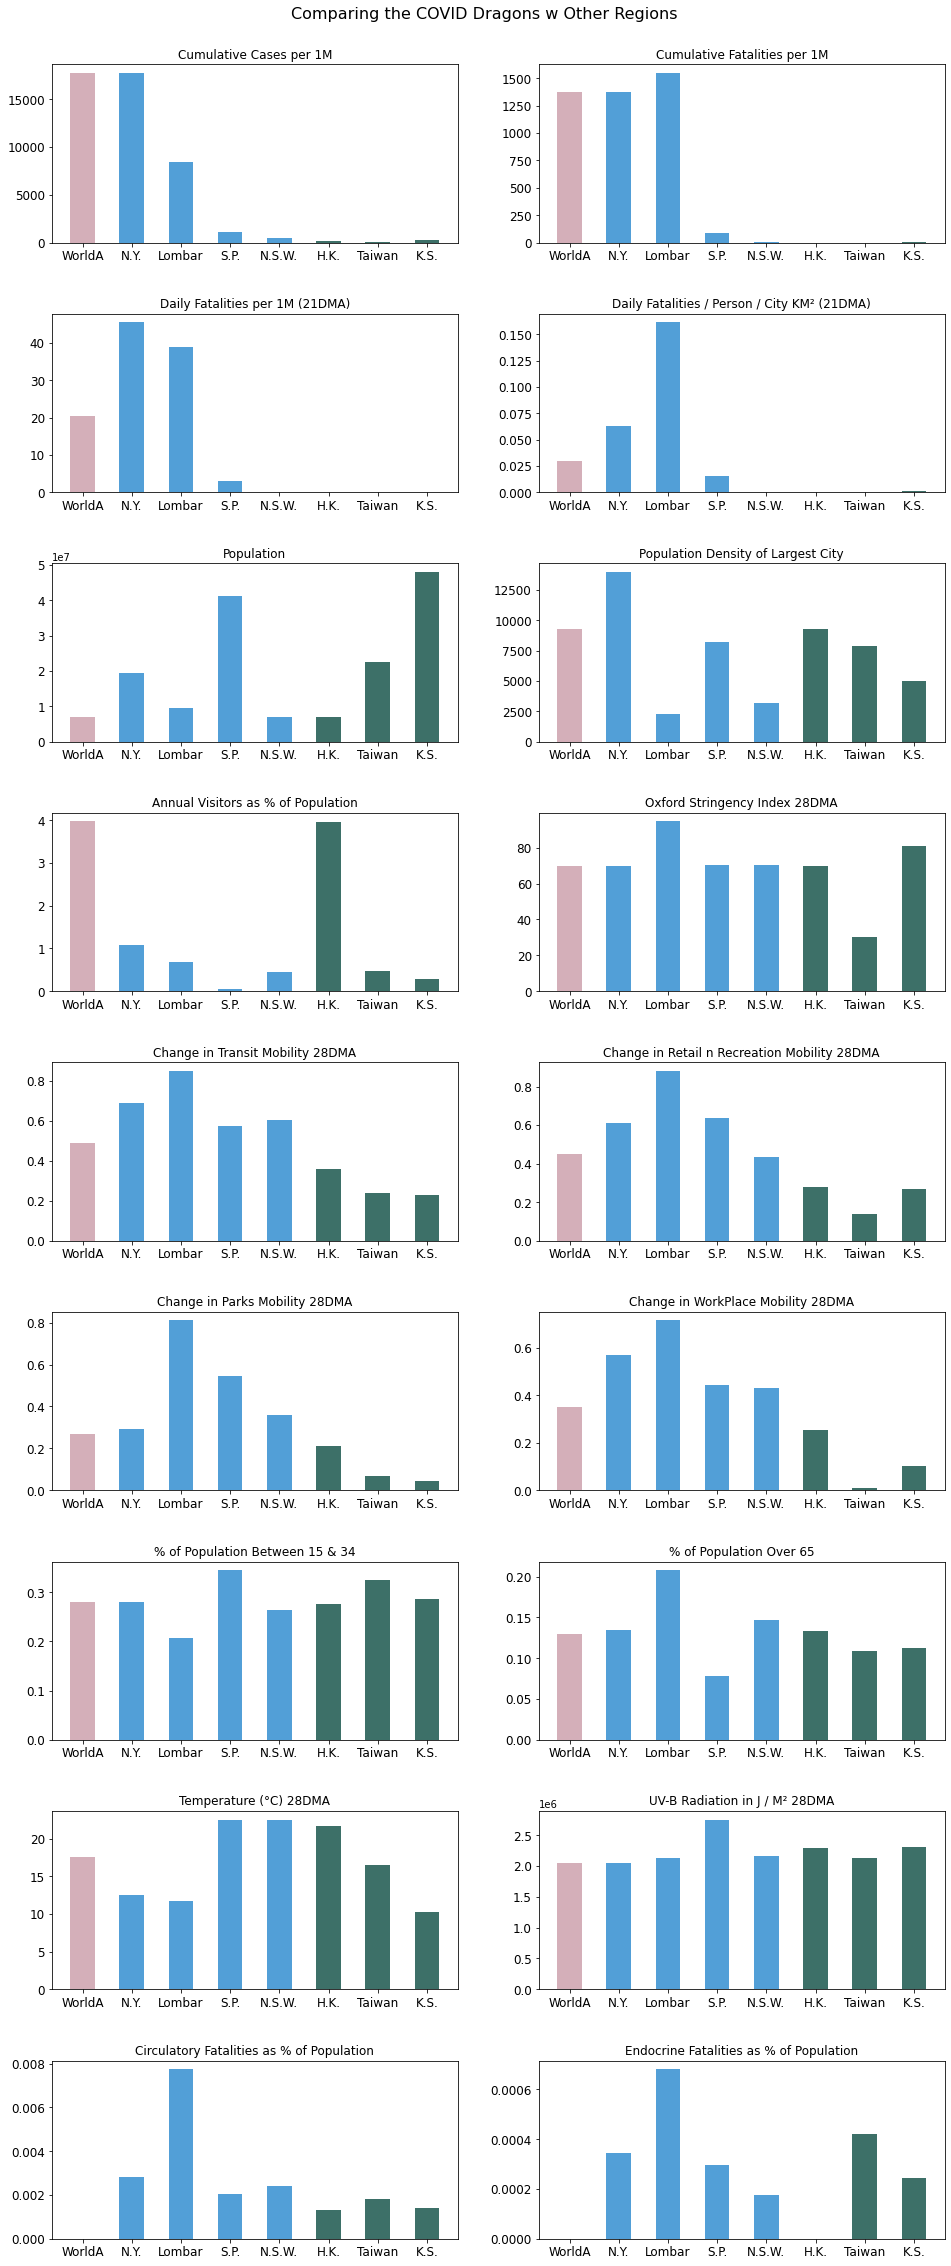

In [138]:
factors = factors1 + factors2 + factors3 + factors9 + factors4 + factors5 + factors6 + factors7 + factors8
kwargs = {'factors': factors,'height': 40, 'colors': ['#3D7068', '#D4AFB9', '#529FD7']}
kwargs['title'] = 'Comparing the COVID Dragons w Other Regions'
plt = casestudy.barcharts.make(**kwargs)

The data for the above charts can be accessed via the `df_bcs` attribute of `barcharts`

In [139]:
casestudy.barcharts.df_bcs.head()

region_name,WorldAvg,New York,Lombardia,Sao Paulo,New South Wales,Hong Kong,Taiwan,"Korea, South"
region_id,REG_FOR_WORLD_AVGS,75,36,556,302,353,497,433
cases,343994,343994,81225,44411,3053,1044,440,10874
deaths,26612,26612,14924,3608,44,4,6,256
population,7.02728e+06,1.93781e+07,9.63118e+06,4.1142e+07,6.90458e+06,7.02728e+06,2.25314e+07,4.79908e+07
city_dens,9261.85,13978.1,2316.88,8184.1,3146.47,9261.85,7919.49,5032.81


## So What Gives?

We have looked at potential factors causing the less severe outbreaks in the Dragons, despite having apparently much less quarantine.

Unfortunately, no one factor or set of factors stands out as an obvious reason.

We can continue the investigation by looking more closely at social distancing. To do so, we will focus on data from Oxford's Government Response Tracker and the Stringency Index, dubbed the `strindex` in `see19`.

The `strindex` and its subcategories are tracked at the country-level, so we will instantiate a `casestudy` setting the `country_level` flag to `true`. This aggregates all the `see19` data up from the province/state level to the country level (where province/state data exists).

**NOTE** we will also instantiate with `start_factor: ''`. This creates a dataset beginning on 2020-01-01.

In [28]:
factors = CaseStudy.STRINDEX_CATS
factor_dmas = {factor: 28 for factor in factors}

regions = ['United States of America (the)', 'Canada', 'Mexico', 'Brazil', 'Australia', 'Russia',
 'Italy', 'Germany', 'Spain', 'Singapore', 'Japan', 'Hong Kong', 'Taiwan', 'Korea, South', 'Malaysia'
]
casestudy = CaseStudy(
    baseframe, regions=regions, count_dma=21, factors=factors, factor_dmas=factor_dmas, 
    start_hurdle=1, start_factor='', lognat=True, country_level=True
)

To visualize the change in government policy in a region, we can use the `scatterflow` attribute (which is an instance of the `ScatterFlow` class).

We can generate a single `scatterflow` for one region that shows each `stringency` indicator. The value of the indicator is denoted by the color of the point. We'll demonstrate with South Korea as an example.

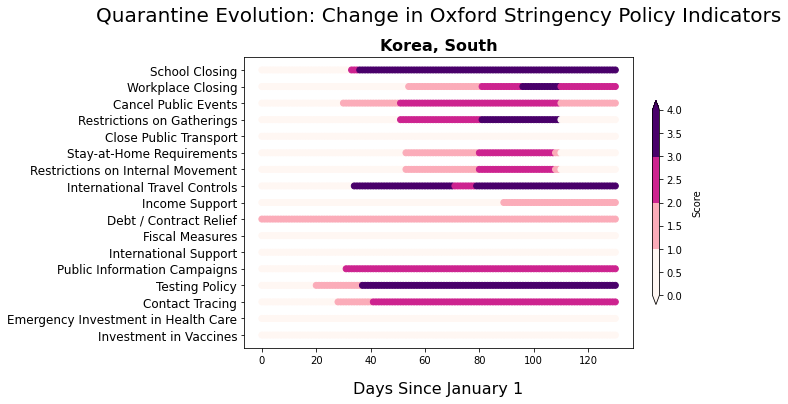

In [29]:
kwargs = {'regions': 'Korea, South', 'width': 6, 'height':4.5, 'xy_cbar': (1.05, .15), 'fs_subtitle': 16, 'fs_ylabel': 12}
plt = casestudy.scatterflow.make(**kwargs)

In [30]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


So above we see that South Korea implemented the most strict school closures around the 35th day of the calendar year (indicated by the dark purple color in the row `School Closing`. A small amount of `Debt / Contract Relief` was implemented almost immediately and several indicators have seen no policy implementation at all.

Now we can expand the plot to cover more regions for comparison purposes.

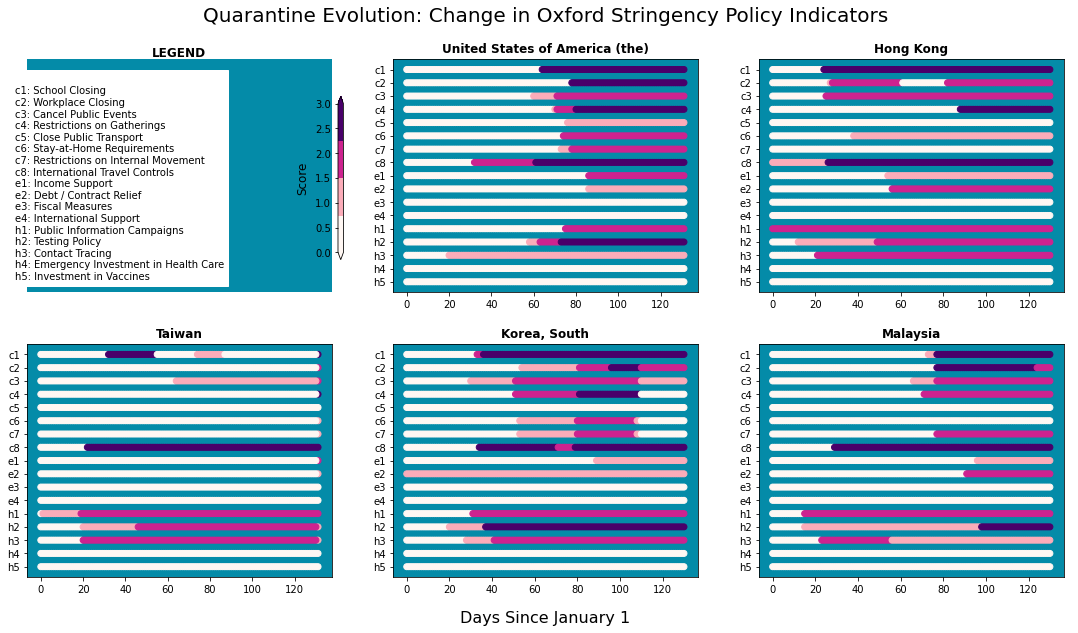

In [36]:
kwargs = {
    'regions': ['United States of America (the)', 'Hong Kong', 'Taiwan', 'Korea, South', 'Malaysia'], 
    'width': 16, 'height': 8, 
    'fs_subtitle': 12, 'fs_ylabel': 10, 'fs_legend': 10,'pad_clabel': 6,
    'fs_clabel': 12, 'y_title': 1.06, 'xy_cbar': (1.02, .14), 'xy_legend': (-.04, .49),
}
plt.rcParams['axes.facecolor'] = '#048ba8'

plt = casestudy.scatterflow.make(**kwargs)

Here we can see that all four of Taiwan, Hong Kong, South Korea, and Malaysia had implemented `h1` to `h3` policy measures on or before the 20th day of the calendar. This is almost 40 days ahead of when the US made serious implemenations in the same areas. 

We'll return to `h1`, `h2`, and `h3` (what I call the `key3`) shortly. For now, lets open the `scatterflow` to an even larger group. The regions will be arranged automatically for ease of comparison.

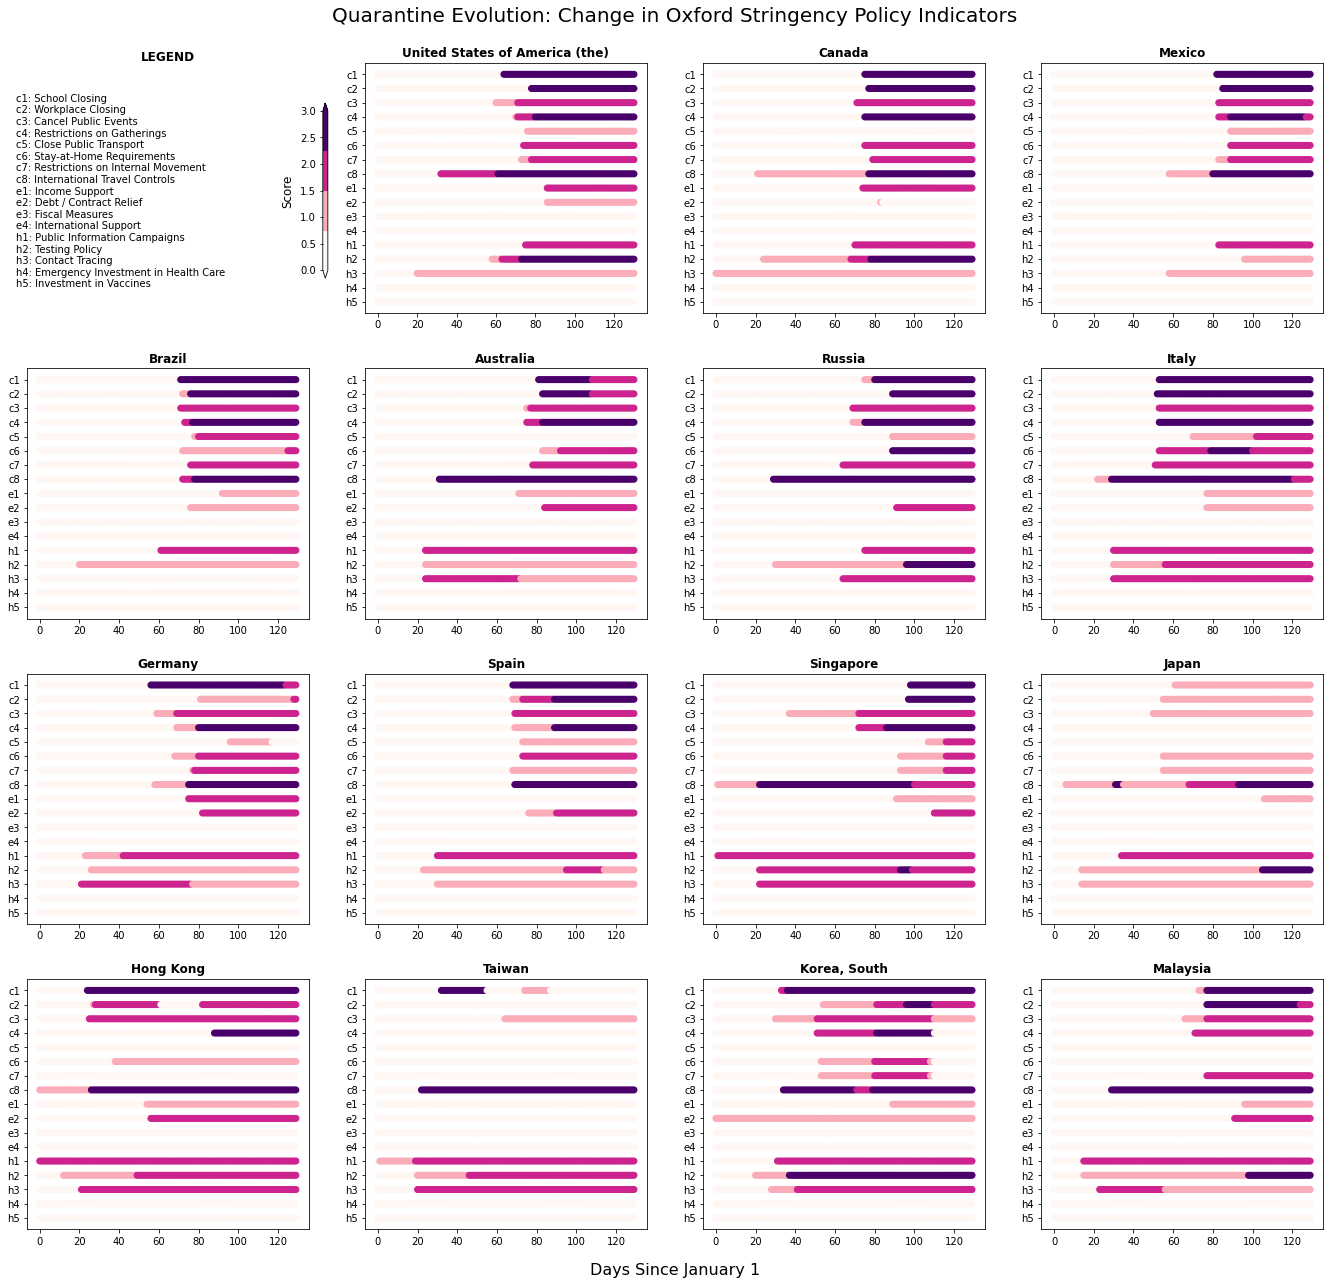

In [146]:
kwargs = {
    'regions': regions,
    'width': 20, 'height': 18, 
    'fs_subtitle': 12, 'fs_ylabel': 10, 'fs_legend': 10,'pad_clabel': 6,
    'fs_clabel': 12, 'y_title': 1.03, 'xy_cbar': (1.05, .14), 'xy_legend': (-.04, .51),
}
plt = casestudy.scatterflow.make(**kwargs)

Visually, when I look at this chart I am usually strike by:

1. how certain regions seemed to implement `h1` to `h3` quickly 
2. how those same regions seem to have had less severe outbreaks, and
3. how those regions did not require the same dramatic quaratine measures later on

We can turn the above structure on its ear, using the `make_race` method. With this method you can select a single existing stringency indicator or sum any combination of existing indicators. Each region will have one value for each point in time and thus we can move the regions to a single y-axis. 

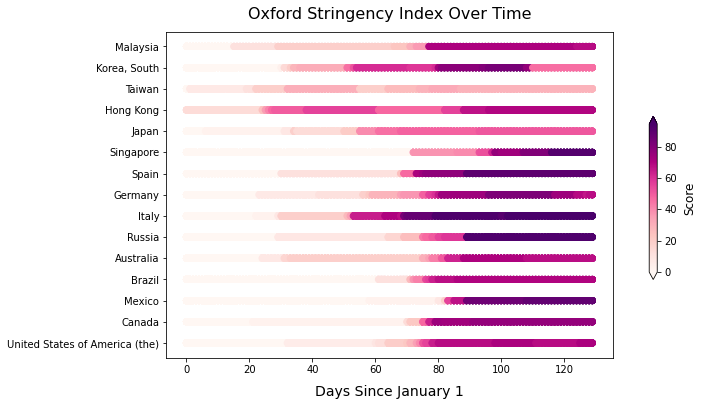

In [148]:
kwargs = {
    'regions': regions,
    'title': 'Oxford Stringency Index Over Time',
    'indicator': 'strindex',
    'width': 8, 'height': 6, 
    'fs_ylabel': 10, 'pad_clabel': 6, 
    'fs_clabel': 12, 'xy_cbar': (.8, .24),
}
plt = casestudy.scatterflow.make_race(**kwargs)

It doesn't apear that there is a major correlation, although the bulk of the Covid Dragons did increase stringency a bit earlier than the other countries. Those other countries ultimatley overtook them as their outbreaks surpassed the Asian countries in severity.

We can narrow our focus on the stringency indicators by summing select indicators. `CaseStudy` does this automatically for the three main sub groups ***Containment and Closure*** `c_sum`, ***Economic*** `e_sum`, and ***Health System*** `h_sum`.

`Casestudy` also provides a custom grouping called the `key3_sum`, which is the summation of the `h1`, `h2`, and `h3` indicators.

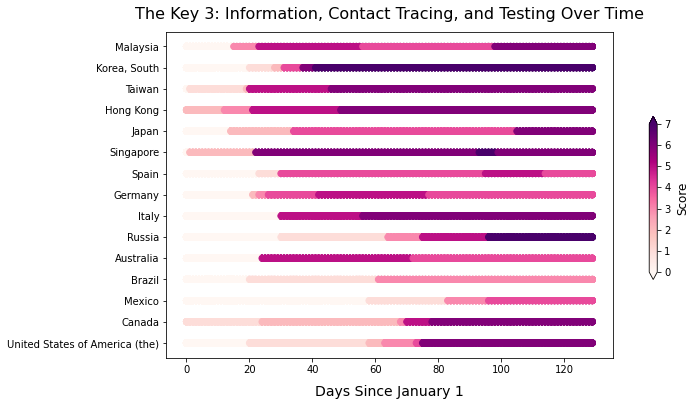

In [149]:
kwargs = {
    'regions': regions,
    'title': 'The Key 3: Information, Contact Tracing, and Testing Over Time',
    'indicator': 'key3_sum',
    'width': 8, 'height': 6, 
    'fs_ylabel': 10, 'pad_clabel': 6, 
    'fs_clabel': 12, 'xy_cbar': (.8, .24),
}
plt = casestudy.scatterflow.make_race(**kwargs)

With the `key3` we can see a bit more clearly the early steps taken by successful countires (the Asian Dragons and also places like Germany and Australia) to curtail the virus.

You can also experiment with your own combinations via the `make_sum` attribute, as per below.

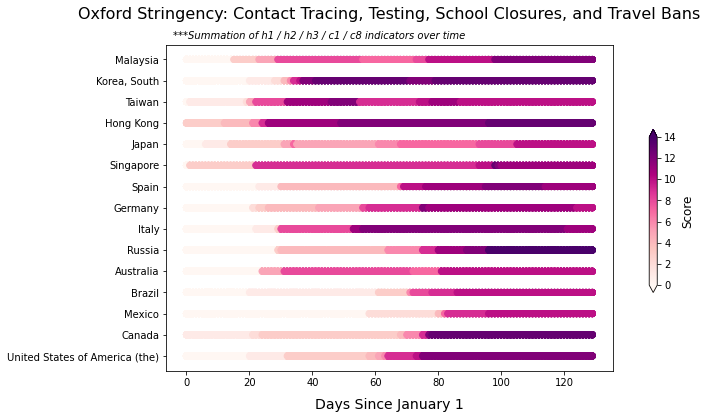

In [150]:
make_sum = ['h1', 'h2', 'h3', 'c1', 'c8']
subtitle = '***Summation of h1 / h2 / h3 / c1 / c8 indicators over time'
kwargs = {
    'regions': regions,
    'title': 'Oxford Stringency: Contact Tracing, Testing, School Closures, and Travel Bans',
    'make_sum': make_sum,
    'width': 8, 'height': 6, 'y_title': 1.06,
    'fs_ylabel': 10, 'pad_clabel': 4, 
    'fs_clabel': 12, 'xy_cbar': (.8, .24),
    'annotations': [
        [-830, 23.5, subtitle, {'color': 'black', 'style': 'italic', 'fontsize':10, 'ha': 'left', 'va': 'center',}],
    ],
}
plt = casestudy.scatterflow.make_race(**kwargs)

## The Earlier The Better

So it appears, at least visually, that countries like the Dragons that implemented the `key3` earlier had less severe outbreaks.

***How can we test this?***

One way is to scale the stringency indicatorss such that earlier ratings have a higher value than later ones, then summing those values together. Countries that moved earlier on the appropriate regions would have higher scores.

To do so, we've added the `favor_earlier` flag and the `_earlier_is_better` private method in the `CaseStudy` class. `_earlier_is_better` takes a series or array of values and scales it so that the values will fall between 1 and 0 with earlier values being closer to 1 and later values being closer to 0.

In [201]:
factors = CaseStudy.STRINDEX_CATS
factor_dmas = {factor: 28 for factor in factors}

countries = ['United States of America (the)', 'Canada', 'Mexico', 'Brazil', 'Australia', 'Russian Federation (the)',
 'Italy', 'Germany', 'Spain', 'Singapore', 'Japan', 'Hong Kong', 'Taiwan (Province of China)', 'Korea (the Republic of)', 'Malaysia'
]

factors_to_favor_earlier = 'key3_sum'
casestudy = CaseStudy(
    baseframe, countries=countries, count_dma=21, factors=factors, factor_dmas=factor_dmas, 
    start_hurdle=1, start_factor='', lognat=True, country_level=True, favor_earlier=True,
    factors_to_favor_earlier=factors_to_favor_earlier,
)

We can then plot the result `key3_sum_earlier` against the max fatality rate for each region in the `casestudy`.

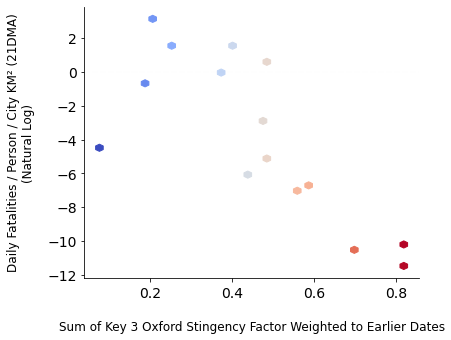

In [207]:
title = 'asdfsd'
note = '*{} regions excluding mainland China'.format(casestudy.df.region_name.unique().size)

kwargs = {
    'comp_category': 'deaths_new_dma_per_person_per_city_KM2_lognat',
    'comp_factor': 'key3_sum_earlier',
    'fs_xticks': 14, 'fs_yticks': 14,
    'fs_xlabel': 12, 'fs_ylabel': 12, 'fs_clabel': 10,
    'width': 6, 'height': 5,
    'hlines': [0], 'hline_alpha': .01,
    'hexsize': 40,
}
plt = casestudy.heatmap.make(**kwargs)

And what we see if is a pretty clear trend. The later the region implemented the `key3`, the bigger their outbreak later on.

**NOW** This is obvioulsy not a enough data to cement the theory as scientific fact. This could be thwarted by any number of possible explanations or randomness. But it does point us in a potential direction to explore.

Perhaps it is not the severity of the quarantine, but simply a good baseline level adherence to the `key3` that allows for both a contained disease and a return to relatively normal life.